# Prodigy InfoTech Data Science Internship Task 3
The aim of this attempt is to predict if the client will subscribe (yes/no) to a term deposit, by building a classification model using Decision Tree for Bank Marketing Dataset.

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

%matplotlib inline

## Importing the dataset

In [2]:
# Load the dataset
bank = pd.read_csv("bank.csv")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### Dependant Variable found in the last column of the dataset
Deposit = 1 if the client has subscribed to a term deposit, 0 otherwise

In [3]:
# Check if the data set contains any null values - 0 null values
bank[bank.isnull().any(axis=1)].count()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [4]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Only the following columns are numerical and rest are Object type

<Axes: xlabel='age', ylabel='Count'>

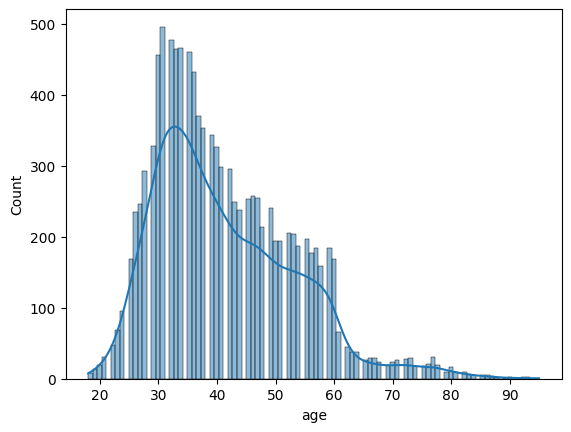

In [5]:
# Distribution of Age
sns.histplot(bank.age, bins=100, kde=True)

<Axes: xlabel='duration', ylabel='Count'>

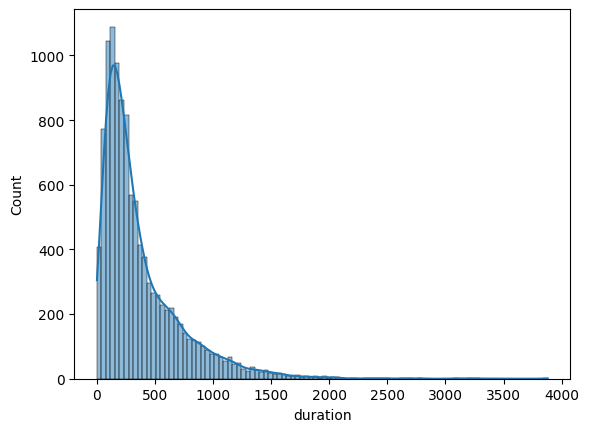

In [6]:
# Distribution of Duration
sns.histplot(bank.duration, bins=100, kde=True)

In [7]:
# The Number of people of a particular job who have subscribed to the term deposit
(bank[bank.deposit == "yes"])["job"].value_counts()

job
management       1301
technician        840
blue-collar       708
admin.            631
retired           516
services          369
student           269
unemployed        202
self-employed     187
entrepreneur      123
housemaid         109
unknown            34
Name: count, dtype: int64

In [8]:
# Total number of people in each job category
bank["job"].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

In [9]:
# Combining Various Jobs into one category
bank["job"] = bank["job"].replace(["management", "admin."], "white-collar")
bank["job"] = bank["job"].replace(["services", "housemaid"], "pink-collar")
bank["job"] = bank["job"].replace(["retired", "student", "unemployed", "unknown"], "other")
bank["job"].value_counts()

job
white-collar     3900
blue-collar      1944
technician       1823
other            1565
pink-collar      1197
self-employed     405
entrepreneur      328
Name: count, dtype: int64

In [10]:
bank.poutcome.value_counts()

poutcome
unknown    8326
failure    1228
success    1071
other       537
Name: count, dtype: int64

In [11]:
bank["poutcome"] = bank["poutcome"].replace(["other"], "unknown")

In [12]:
bank["contact"].value_counts()

contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64

In [13]:
# Dropping contact column as it is not required
bank.drop("contact", axis=1, inplace=True)

In [14]:
bank.default.value_counts()

default
no     10994
yes      168
Name: count, dtype: int64

In [15]:
# Converting to binary
bank["default"] = bank["default"].replace(["yes", "no"], [1, 0])

In [16]:
bank.housing.value_counts()

housing
no     5881
yes    5281
Name: count, dtype: int64

In [17]:
# converting to binary
bank["housing"] = bank["housing"].replace(["yes", "no"], [1, 0])

In [18]:
bank.loan.value_counts()

loan
no     9702
yes    1460
Name: count, dtype: int64

In [19]:
# Converting to binary
bank["loan"] = bank["loan"].replace(["yes", "no"], [1, 0])

In [20]:
# day  : last contact day of the month
# month: last contact month of year
# Drop 'month' and 'day' as they don't have any intrinsic meaning
bank.drop(["month", "day"], axis=1, inplace=True)

In [21]:
bank.deposit.value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

In [22]:
# Converting to binary
bank["deposit"] = bank["deposit"].replace(["yes", "no"], [1, 0])

In [23]:
# Printing Deposit and Loan Values
bank[["deposit", "loan"]].value_counts()

deposit  loan
0        0       4897
1        0       4805
0        1        976
1        1        484
Name: count, dtype: int64

In [24]:
# pdays: number of days that passed by after the client was last contacted from a previous campaign
# -1 means client was not previously contacted
print("Customers who were not previously contacted: ", len(bank[bank.pdays == -1]))
print("Customers who were previously contacted: ", len(bank[bank.pdays != -1]))
max(bank.pdays)

Customers who were not previously contacted:  8324
Customers who were previously contacted:  2838


854

In [25]:
# Converting all -1 to a large number so that it can be used as a feature
bank.loc[bank["pdays"] == -1, "pdays"] = 10000

In [26]:
# Converting pdays to Fractions
bank["pdays"] = 1/bank["pdays"]

In [27]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,deposit
0,59,white-collar,married,secondary,0,2343,1,0,1042,1,0.0001,0,unknown,1
1,56,white-collar,married,secondary,0,45,0,0,1467,1,0.0001,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,1389,1,0.0001,0,unknown,1
3,55,pink-collar,married,secondary,0,2476,1,0,579,1,0.0001,0,unknown,1
4,54,white-collar,married,tertiary,0,184,0,0,673,2,0.0001,0,unknown,1


In [28]:
# Finding all the categorical variables and Numerical Variables
categorical = [var for var in bank.columns if bank[var].dtype == "O"]
numerical = [var for var in bank.columns if bank[var].dtype != "O"]
categorical

['job', 'marital', 'education', 'poutcome']

### Encoding categorical data

In [29]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for var in categorical:
    bank[var] = label_encoder.fit_transform(bank[var])
bank.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,deposit
0,59,6,1,1,0,2343,1,0,1042,1,0.0001,0,2,1
1,56,6,1,1,0,45,0,0,1467,1,0.0001,0,2,1
2,41,5,1,1,0,1270,1,0,1389,1,0.0001,0,2,1
3,55,3,1,1,0,2476,1,0,579,1,0.0001,0,2,1
4,54,6,1,2,0,184,0,0,673,2,0.0001,0,2,1


Now all the columns are numerical

## Training the Decision Tree Classification model on the Training set

In [30]:
X = bank.drop("deposit", axis=1)
Y = bank["deposit"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_test_pred = dt.predict(x_test)

# Calculating Accuracy
print("Accuracy: ", metrics.accuracy_score(y_test, y_test_pred))

Accuracy:  0.7318602567930725


# Hyperparameter Tuning

In [31]:
# Hyperparameter Tuning for the Decision Tree
from sklearn.model_selection import GridSearchCV
param_grid = {
    "random_state" : [37, 40, 42, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
    "max_depth" : [2, 4, 5, 6, 7, 8, 9, 10]
}
best_dt = GridSearchCV(estimator=dt, param_grid=param_grid, n_jobs=-1)
# Finding the parameters of params
best_dt.fit(x_train, y_train)
best_dt.best_params_
# Output: {'max_depth': 7, 'random_state': 70}


{'max_depth': 7, 'random_state': 70}

In [32]:
# Score of the best estimator
best_dt.score(x_test, y_test)

0.7900865930128397

In [33]:
dt = DecisionTreeClassifier(max_depth=7, random_state=70)
dt.fit(x_train, y_train)
y_test_pred = dt.predict(x_test)
metrics.accuracy_score(y_test, y_test_pred)

0.7900865930128397

## Visualising the Decision Tree

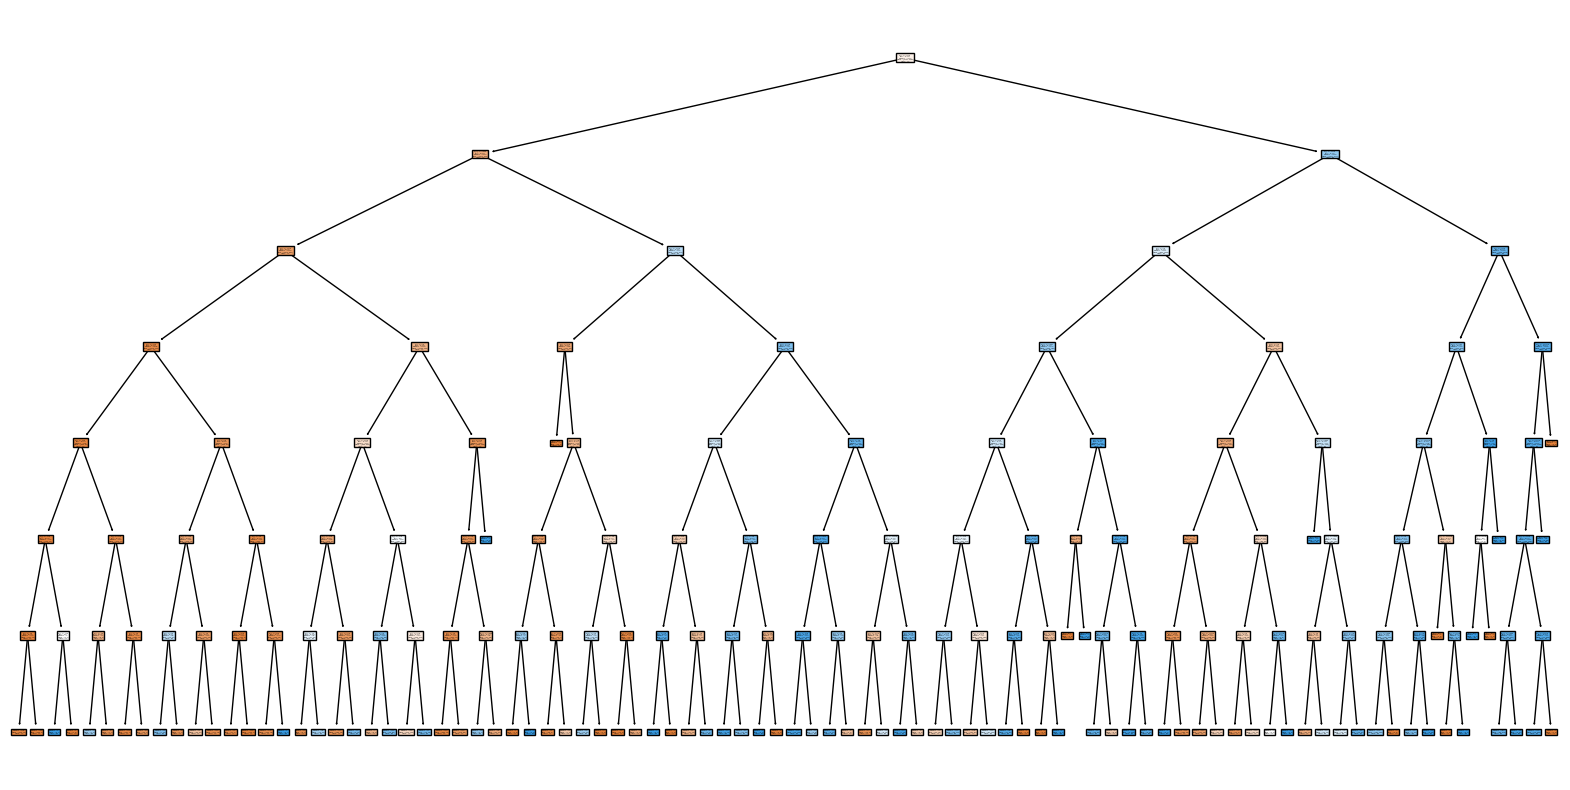

In [34]:
plt.figure(figsize=(20, 10))
plot_tree(dt, class_names=["Yes","No"], filled=True)
plt.show()

## Conclusion

In this notebook, we performed a classification task using the Bank Marketing Dataset. We started by importing the necessary libraries and loading the dataset. We then conducted exploratory data analysis to gain insights into the data.

We preprocessed the data by handling missing values, encoding categorical variables, and converting binary variables to numerical format. We split the data into training and testing sets and trained a Decision Tree Classifier on the training set.

After training the model, we evaluated its performance using accuracy as the evaluation metric. We also performed hyperparameter tuning using GridSearchCV to find the best parameters for the Decision Tree Classifier.

Finally, we visualized the decision tree model and provided a conclusion for the notebook.

Overall, this notebook demonstrates the process of building a classification model using a decision tree algorithm and provides insights into the bank marketing dataset.
